# 🎯 Ejemplo de ajuste no lineal del Movimiento Armónico Simple (M.A.S.)

En esta notebook aprenderás a:
- Cargar tus datos experimentales desde un archivo `.txt` exportado de Logger Pro
- Acotar el intervalo de análisis a un tramo aproximadamente periódico
- Ajustar las ecuaciones del Movimiento Armónico Simple (M.A.S.)
- Visualizar y comparar tus datos con el modelo ajustado

---

In [ ]:
# 📥 Carga de datos desde archivo exportado
import numpy as np

# Ruta del archivo .txt exportado desde Logger Pro
ruta_archivo = "data/30hz_2.txt"

# Cargar el archivo (ajustar skip_header si es necesario)
data = np.genfromtxt(ruta_archivo, skip_header=7)

# Verifica las primeras filas
print("Primeras filas del archivo completo:")
print(data[:5])

Primeras filas del archivo completo:
[[ 0.033333    0.5729815   0.033157   -0.84336812  0.          0.
   0.        ]
 [ 0.066666    0.575211   -0.00100043 -0.57707331  0.          0.
   0.        ]
 [ 0.099999    0.5729815  -0.01903669 -0.18565246  0.          0.
   0.        ]
 [ 0.133332    0.57281    -0.00886092  0.08036841  0.          0.
   0.01212058]
 [ 0.166665    0.5726385  -0.00328712  0.06509984  0.          0.
   0.08484409]]


In [65]:
# 🔍 Acotado de datos por intervalo de tiempo
# Elegimos un intervalo donde la señal de aceleración sea aproximadamente periódica

t_total = data[:, 0]  # columna de tiempo

# Define el rango de tiempo (ajustable por el alumno)
t_min = 1.25
t_max = 2.75

# Crear máscara y aplicar
mascara = (t_total >= t_min) & (t_total <= t_max)
datos = data[mascara]

# Separar columnas
t, x, v, a, theta, omega, alpha = datos.T

print(f"Datos acotados entre t = {t_min}s y {t_max}s. Total de muestras: {len(t)}")

Datos acotados entre t = 1.25s y 2.75s. Total de muestras: 45


In [66]:
# 🧮 Ajuste no lineal de x(t) usando modelo del M.A.S.
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def x_mas(t, A0, A, w, phi):
    return A0 + A * np.cos(w * t + phi)

# Estimar valores iniciales
A0_est = (np.max(x) + np.min(x)) / 2
A_est = (np.max(x) - np.min(x)) / 2
w_est = 2 * np.pi  # Hz = 1 ciclo/seg

p0 = [A0_est, A_est, w_est, 0]
popt, _ = curve_fit(x_mas, t, x, p0=p0)

# Valores ajustados
A0_fit, A_fit, w_fit, phi_fit = popt
print(f"A0 = {A0_fit:.4f}, A = {A_fit:.4f}, ω = {w_fit:.4f}, φ = {phi_fit:.4f}")

A0 = 0.5199, A = -0.0670, ω = 2.1531, φ = 9.0263


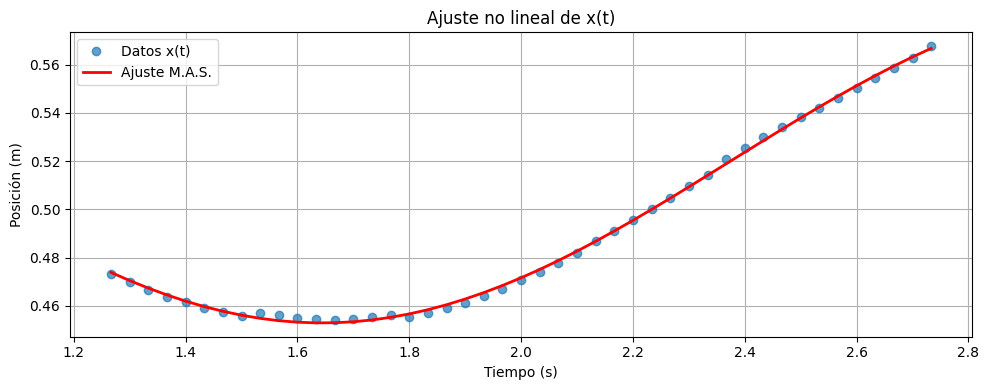

In [67]:
# 📈 Gráfica de comparación
x_ajustada = x_mas(t, *popt)

plt.figure(figsize=(10, 4))
plt.plot(t, x, label="Datos x(t)", marker='o', linestyle='', alpha=0.7)
plt.plot(t, x_ajustada, label="Ajuste M.A.S.", color='red', linewidth=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Ajuste no lineal de x(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🧮 Ajuste de velocidad y aceleración

Utilizamos las expresiones derivadas del M.A.S. para ajustar los datos de velocidad y aceleración:

In [68]:
# --- Definiciones de funciones ---
def v_mas(t, A, w, phi):
    return -w * A * np.sin(w * t + phi)

def a_mas(t, A, w, phi):
    return -w**2 * A * np.cos(w * t + phi)

# --- Ajuste de velocidad ---
popt_v, _ = curve_fit(v_mas, t, v, p0=[A_fit, w_fit, phi_fit])
v_ajustada = v_mas(t, *popt_v)

# --- Ajuste de aceleración ---
popt_a, _ = curve_fit(a_mas, t, a, p0=[A_fit, w_fit, phi_fit])
a_ajustada = a_mas(t, *popt_a)

# Mostrar parámetros
print("Parámetros del ajuste de velocidad: A = {:.4f}, ω = {:.4f}, φ = {:.4f}".format(*popt_v))
print("Parámetros del ajuste de aceleración: A = {:.4f}, ω = {:.4f}, φ = {:.4f}".format(*popt_a))

Parámetros del ajuste de velocidad: A = -0.0702, ω = 2.0620, φ = 9.1822
Parámetros del ajuste de aceleración: A = -0.1447, ω = 1.4033, φ = 10.5696


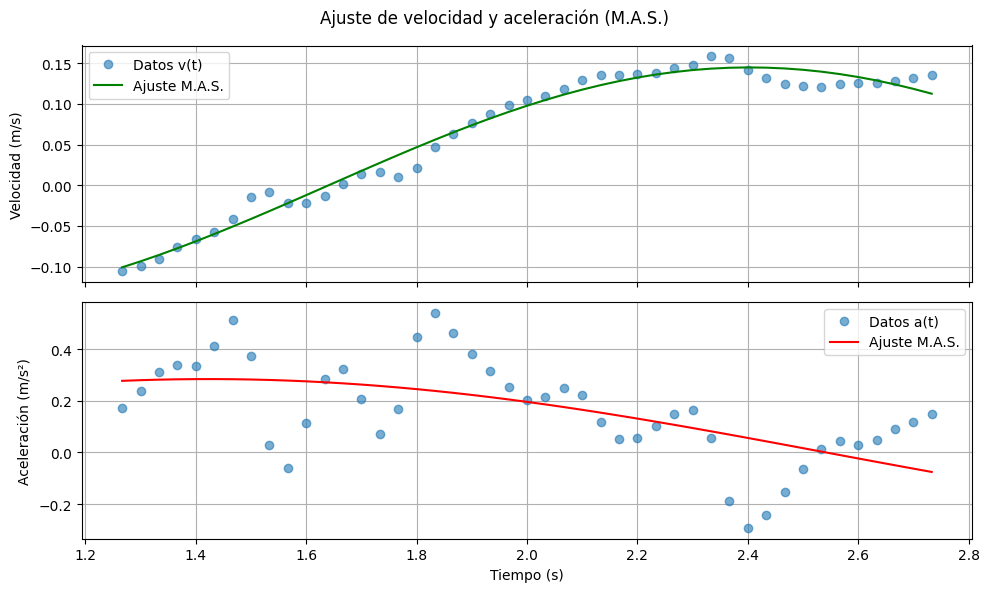

In [69]:
# --- Gráficas comparativas ---
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Velocidad
axs[0].plot(t, v, label="Datos v(t)", marker='o', linestyle='', alpha=0.6)
axs[0].plot(t, v_ajustada, label="Ajuste M.A.S.", color='green')
axs[0].set_ylabel("Velocidad (m/s)")
axs[0].legend()
axs[0].grid(True)

# Aceleración
axs[1].plot(t, a, label="Datos a(t)", marker='o', linestyle='', alpha=0.6)
axs[1].plot(t, a_ajustada, label="Ajuste M.A.S.", color='red')
axs[1].set_ylabel("Aceleración (m/s²)")
axs[1].set_xlabel("Tiempo (s)")
axs[1].legend()
axs[1].grid(True)

plt.suptitle("Ajuste de velocidad y aceleración (M.A.S.)")
plt.tight_layout()
plt.show()